## Due to Zomato API Basic Plan restriction, it was not possible to collect enough data for analysis. So, instead of directly collecting data using the API, we now analyse the data from a csv file containing Zomato database in order to make useful inference and analyse deeper.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
from collections import defaultdict
from math import isnan

In [2]:
#creating a dataframe out of the given csv file
df=pd.read_csv(r"C:\Users\hp\Desktop\zomato.csv", encoding='latin-1')
df.dropna(inplace=True)

## Analysis 1: Delhi NCR vs Rest of India

In [3]:
# we are creating a seperate dataframe so as to analyse only restaurants present in indian cities
df_india=df.loc[df['Country Code']==1]
df_india

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,193
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,85
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,Indian Rupees(Rs.),No,No,No,No,2,4.3,Green,Very Good,172
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,74


In [4]:
# creating a seperate dataframe for Delhi NCR
df_delhi=df_india.loc[df_india['City']=='New Delhi']
df_delhi

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,18445274,Motu N Patlu,1,New Delhi,"Batla House Chowk, Near Jamia Milia Islamia, O...",Zakir Nagar,"Zakir Nagar, New Delhi",77.285065,28.566246,"Lebanese, North Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
8029,18168147,S.K. Fast Food,1,New Delhi,"161/32, Shop 3 Joga Bai, Main Road, Zakir Naga...",Zakir Nagar,"Zakir Nagar, New Delhi",77.283827,28.566189,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
8030,18429375,Sufiyan Restaurant,1,New Delhi,"57/12, Main Road, Zakir Nagar, New Delhi",Zakir Nagar,"Zakir Nagar, New Delhi",77.279779,28.567321,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
8031,310479,The Relax Point,1,New Delhi,"92/17, Zakir Nagar, New Delhi",Zakir Nagar,"Zakir Nagar, New Delhi",77.278543,28.566849,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


In [5]:
#data frame for remaining cities of India
df_roi=df_india.loc[df_india['City']!='New Delhi']
df_roi

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,193
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,85
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,Indian Rupees(Rs.),No,No,No,No,2,4.3,Green,Very Good,172
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,74


Text(0, 0.5, 'Number of Restaurants')

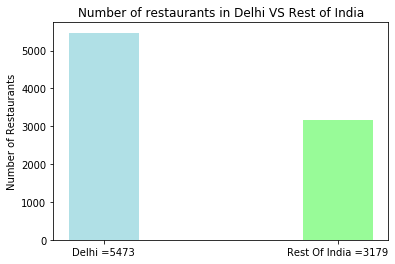

In [6]:
#comparing number of restaurants in delhi versus other indian cities
delhi_res=len(df_delhi)
roi_res=len(df_roi)
res=[delhi_res, roi_res]
labels=['Delhi ='+str(delhi_res), 'Rest Of India ='+str(roi_res)]
plt.bar(labels, res, align='center', color=['powderblue', 'palegreen'], width=[0.3, 0.3])
plt.title('Number of restaurants in Delhi VS Rest of India')
plt.ylabel('Number of Restaurants')

In [7]:
#cuisines served in restaurants of Delhi NCR
cuisines1=list(df_delhi['Cuisines'].values)
delhi_cuis=[]
for i in cuisines1:
    i=i.strip().split(',')
    for j in i:
        delhi_cuis.append(j.strip())
delhi_cuisines=list(set(delhi_cuis))
delhi_cuisines

['Mughlai',
 'Asian',
 'Tibetan',
 'Turkish',
 'British',
 'Mexican',
 'Fast Food',
 'Naga',
 'Healthy Food',
 'Cuisine Varies',
 'Malaysian',
 'Juices',
 'South American',
 'Mangalorean',
 'European',
 'Indonesian',
 'Pizza',
 'Sandwich',
 'Spanish',
 'Mediterranean',
 'Cafe',
 'Chinese',
 'Parsi',
 'North Eastern',
 'Chettinad',
 'Kerala',
 'Awadhi',
 'Lebanese',
 'Gujarati',
 'Lucknowi',
 'South Indian',
 'Andhra',
 'Continental',
 'Bihari',
 'Maharashtrian',
 'Burmese',
 'North Indian',
 'Ice Cream',
 'Korean',
 'Deli',
 'Nepalese',
 'Iranian',
 'Armenian',
 'Indian',
 'Hyderabadi',
 'Raw Meats',
 'Middle Eastern',
 'French',
 'Pakistani',
 'Goan',
 'Sushi',
 'Vietnamese',
 'Bakery',
 'Portuguese',
 'Afghani',
 'Japanese',
 'Salad',
 'Thai',
 'Modern Indian',
 'Mithai',
 'American',
 'Drinks Only',
 'Finger Food',
 'Desserts',
 'Seafood',
 'African',
 'Burger',
 'Beverages',
 'Rajasthani',
 'Assamese',
 'Street Food',
 'Kashmiri',
 'Tex-Mex',
 'Tea',
 'Biryani',
 'Bengali',
 'Moroc

In [8]:
#cuisines served by restaurants in other parts of India
cuisines2=list(df_roi['Cuisines'].values)
roi_cuis=[]
for i in cuisines2:
    i=i.strip().split(',')
    for j in i:
        roi_cuis.append(j.strip())
roi_cuisines=list(set(roi_cuis))
roi_cuisines

['Mughlai',
 'Asian',
 'German',
 'Persian',
 'Tibetan',
 'British',
 'Mexican',
 'Fast Food',
 'Healthy Food',
 'Malaysian',
 'Juices',
 'South American',
 'Mangalorean',
 'European',
 'Indonesian',
 'Pizza',
 'Sandwich',
 'Spanish',
 'Cafe',
 'Mediterranean',
 'Chinese',
 'Parsi',
 'North Eastern',
 'Chettinad',
 'Kerala',
 'Malwani',
 'Awadhi',
 'Gujarati',
 'Lebanese',
 'Lucknowi',
 'BBQ',
 'South Indian',
 'Andhra',
 'Belgian',
 'Continental',
 'Bihari',
 'Maharashtrian',
 'Cajun',
 'Burmese',
 'North Indian',
 'Ice Cream',
 'Korean',
 'Nepalese',
 'Iranian',
 'Steak',
 'Armenian',
 'Indian',
 'Hyderabadi',
 'Raw Meats',
 'French',
 'Middle Eastern',
 'Pakistani',
 'Goan',
 'Sushi',
 'Vietnamese',
 'Bakery',
 'Portuguese',
 'Afghani',
 'Japanese',
 'Salad',
 'Greek',
 'Thai',
 'Modern Indian',
 'Charcoal Grill',
 'Mithai',
 'American',
 'Drinks Only',
 'Finger Food',
 'Desserts',
 'Seafood',
 'African',
 'Burger',
 'Beverages',
 'Rajasthani',
 'Assamese',
 'Street Food',
 'Tex-Mex

In [9]:
#Finding those cuisines not served in Delhi but outside Delhi
print('The cuisines types not served in Delhi are:')
for i in roi_cuisines:
    if i not in delhi_cuisines:
        print(i)

The cuisines types not served in Delhi are:
German
Persian
Malwani
BBQ
Belgian
Cajun
Steak
Greek
Charcoal Grill


### On rechecking the above result with Zomato API, it was found that only Charcoal Grill, Cajun, German, and Persian cuisine styles were actually not served in New Delhi, whereas details regarding the other cuisines may have been missing due to insufficient data.

In [10]:
cuisines_no_delhi={}
for i in delhi_cuis:
    if i in cuisines_no_delhi:
        cuisines_no_delhi[i]+=1
    else:
        cuisines_no_delhi[i]=1
cuisines_no_roi={}
for i in roi_cuis:
    if i in cuisines_no_roi:
        cuisines_no_roi[i]+=1
    else:
        cuisines_no_roi[i]=1
top10cuisines_delhi=dict(sorted(cuisines_no_delhi.items(), key=operator.itemgetter(1), reverse=True)[0:10])
top10cuisines_roi=dict(sorted(cuisines_no_roi.items(), key=operator.itemgetter(1), reverse=True)[0:10])
cuisines_in_delhi=[]
no_in_delhi=[]
cuisines_in_roi=[]
no_in_roi=[]

In [11]:
# Top 10 cuisines served in New Delhi
print('Top 10 Cuisines served in New Delhi NCR are:')
print('Cuisine Style     Number of restaurants')
for i in top10cuisines_delhi:
    if i!='Bakery':
        print(str(i), '\t', '\t', str(top10cuisines_delhi[i]))
    else:
        print(str(i), '\t', '\t', '\t', str(top10cuisines_roi[i]))

Top 10 Cuisines served in New Delhi NCR are:
Cuisine Style     Number of restaurants
North Indian 	 	 2425
Chinese 	 	 1638
Fast Food 	 	 1304
Mughlai 	 	 628
Bakery 	 	 	 261
South Indian 	 	 411
Street Food 	 	 411
Desserts 	 	 383
Italian 	 	 376
Continental 	 	 373


In [12]:
#Top 10 cusines served in Rest of India
print('Top 10 Cuisines served in Rest Of India are:')
print('Cuisine Style     Number of restaurants')
for i in top10cuisines_roi:
    if i not in ['Bakery', 'Cafe']:
        print(str(i), '\t', '\t', str(top10cuisines_roi[i]))
    else :
        print(str(i), '\t', '\t', '\t', str(top10cuisines_roi[i]))


Top 10 Cuisines served in Rest Of India are:
Cuisine Style     Number of restaurants
North Indian 	 	 1521
Chinese 	 	 1052
Fast Food 	 	 659
Mughlai 	 	 364
Continental 	 	 351
Italian 	 	 306
Cafe 	 	 	 302
Bakery 	 	 	 261
South Indian 	 	 220
Desserts 	 	 214


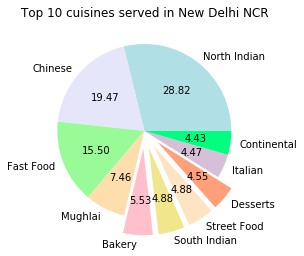

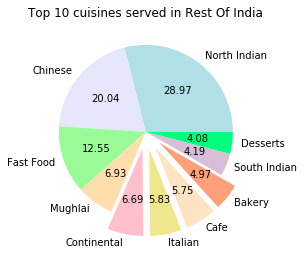

In [13]:
keys, values=zip(*top10cuisines_delhi.items())
cuisines_in_delhi=list(keys)
no_in_delhi=list(values)
keys, values=zip(*top10cuisines_roi.items())
cuisines_in_roi=list(keys)
no_in_roi=list(values)
colors=['powderblue', 'lavender', 'palegreen', 'navajowhite', 'pink', 'khaki', 'bisque', 'lightsalmon', 'thistle', 'springgreen']
plt.pie(no_in_delhi, labels= cuisines_in_delhi, colors=colors, autopct='%.2f', explode=(0,0,0,0,0.2,0.2,0.2,0.2,0,0))
plt.title('Top 10 cuisines served in New Delhi NCR')
plt.show()
plt.pie(no_in_roi, labels= cuisines_in_roi, colors=colors, autopct='%.2f', explode=(0,0,0,0,0.2,0.2,0.2,0.2,0,0))
plt.title('Top 10 cuisines served in Rest Of India')
plt.show()

## Analysis from the above pie charts regarding restaurants that are linked with Zomato API:
#### 1. Top 4 cuisines served in New Delhi NCR and rest of India are the same, with the only difference in their percentage.
#### (Chinese Cuisines are served more outside India, while Fast food, Mughlai and North Indian dishes are served more in Delhi)
#### 2.  Continental, Italian and Cafe cuisines are served in considerably higher rates outside Delhi.
#### 3.  Bakery, Street food and Desert cuisines are served in considerably higher rates outside Delhi.
#### 4. Interestingly, South Indian food is actually served more in Delhi than the rest of India ( considering restaurants linked with Zomato ONLY)

# Analysis 2: User Ratings and their effect on Restaurant Selection

### a) User Rating vs Restaurant Votes

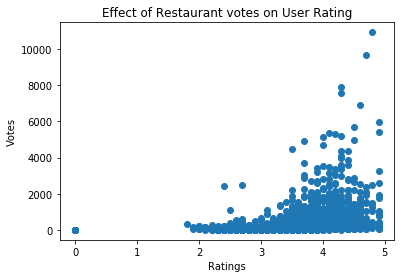

In [14]:
rating=list(df_india['Aggregate rating'].values)
votes=list(df_india['Votes'].values)
plt.scatter(rating, votes)
plt.xlabel('Ratings')
plt.ylabel('Votes')
plt.title('Effect of Restaurant votes on User Rating')
plt.show()

### Restaurants between an aggregate rating between 3-5 were the ones that received the most number of reviews. Sometimes, even though restaurant reviews maybe high for a restaurant, its rating maybe be low due to the fact that the majority of reviews were actually carrying a negative feedback. However, in the above graph, it is evident that inspite of the high reviews, the ratings actually don't drop down. This is because of the majority of them being positive feedbacks about the restaurant. Hence, the inference that can be made from the above graph is,
# More the restaurant votes "carrying a positive feedback", more will be the restaurant rating. 

### b) User Rating vs Number of Cuisines served per restaurant

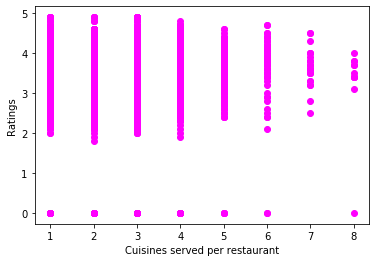

In [15]:
indian_cuisines=df_india['Cuisines'].apply(lambda i:i.strip().split(','))
cuisines_per_res=[]
for i in indian_cuisines:
    cuisines_per_res.append(len(i))
plt.scatter(cuisines_per_res, rating, c='magenta')
plt.ylabel('Ratings')
plt.xlabel('Cuisines served per restaurant')
plt.show()

### It can be inferred from the above graph that user ratings aren't significantly affected by the number of cuisines served by a particular restaurant ( Zeroes in ratings is due to missing data)

### c) User Rating vs Average Restaurant cost

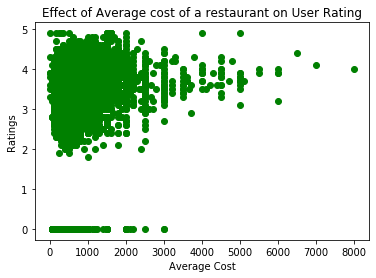

In [16]:
avgcost=list(df_india['Average Cost for two'].values)
plt.scatter(avgcost, rating, c='g')
plt.ylabel('Ratings')
plt.xlabel('Average Cost')
plt.title('Effect of Average cost of a restaurant on User Rating')
plt.show()

### From the above graph, it can be clearly interpreted that restaurants with an average cost of less than 3k are generally preferred by the majority of customers and hence significantly resulted in higher number of positive reviews for these restaurants which in turn helped to up their ratings.

### d) User Rating vs Specific Cuisine types

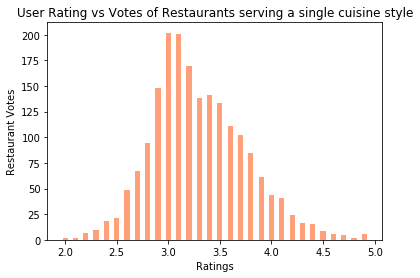

In [17]:
cuisines_ind=list(df_india['Cuisines'].values)
r=[]
for i in range(len(cuisines_ind)):
    cuisines_ind[i]=cuisines_ind[i].strip().split(',')
    if len(cuisines_ind[i])==1:
        r.append(rating[i])
restaurant_rating={}        
for i in r:
    if int(i)!=0:
        if i in restaurant_rating:
            restaurant_rating[i]+=1
        else:
            restaurant_rating[i]=1
keys, values=zip(*restaurant_rating.items())
ratings_res_one_cuis=list(keys)
res_one_cuis=list(values)
width=tuple([0.05]*len(res_one_cuis))
plt.bar(ratings_res_one_cuis, res_one_cuis, width=width, color='lightsalmon')
plt.title('User Rating vs Votes of Restaurants serving a single cuisine style')
plt.ylabel('Restaurant Votes')
plt.xlabel('Ratings')
plt.show()

### The above graph shows that the maximum number of votes of those restaurants serving a peculiar cuisine was around the 3-3.5 star region, with a significantly low value of votes for very high and very low rated restaurants. 

### e) Finding Top 10 Restaurants with weighted restaurant ratings:
### Here, Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes)

In [18]:
localities=list(df_india['Locality'].values)
a=[]
d=[]
for i in range(len(localities)):
    b=(localities[i].strip(), rating[i]*votes[i])
    a.append(b)#appending list of locality and rating*votes associated to that locality for a given restaurant
    c=(localities[i].strip(), votes[i])
    d.append(c)#appending list of locality and votes associated to that locality for a given restaurant
res1=defaultdict(list)#to create a dict containing a list of localities and list of votes*rating per locality which we sum up later on to find total sum*votes per locality
res2=defaultdict(list)#to create a dict containing a list of localities and list of votes per locality which we sum up later on to find total votes per locality
for i,j in a:
    res1[i].append(j)
for i,j in d:
    res2[i].append(j)
localities_rating_andvotesclubbed=dict(res1)#dict that will show localities with total sum of (rating*votes) per locality
localities_votesclubbed=dict(res2)#dict that will show localities with total sum of votes per locality
for i in localities_rating_andvotesclubbed:
    localities_rating_andvotesclubbed[i]=sum(localities_rating_andvotesclubbed[i])#rating*votes are stored as list here, so we sum them up
for i in localities_votesclubbed:
    localities_votesclubbed[i]=sum(localities_votesclubbed[i])#same reason as previous comment
keys, values=zip(*localities_votesclubbed.items())
locality=list(keys)#list of localites
votes_per_locality=(list(values))#list of only total sum of votes per locality
keys, values=zip(*localities_rating_andvotesclubbed.items())
ratingsandvotes_per_locality=(list(values))#list of total sum of votes*rating per locality
weighted_rating=[]
for i in range(len(ratingsandvotes_per_locality)):
    weighted_rating.append(round(ratingsandvotes_per_locality[i]/votes_per_locality[i],1))
localities_weighted_ratings=dict(zip(locality, weighted_rating))
localities_weighted_ratings={i: localities_weighted_ratings[i] for i in localities_weighted_ratings if not isnan(localities_weighted_ratings[i])}
localities_weighted_ratings=dict(sorted(localities_weighted_ratings.items(), key=operator.itemgetter(1), reverse=True)[0:10])
print('Top 10 Localities with Highest Weighted Restaurant Ratings in India:')
print('Locality                           Weighted Rating')
for i in localities_weighted_ratings:
    if str(i) in ['Hotel Clarks Amer, Malviya Nagar','Express Avenue Mall,  Royapettah']:
        print(str(i), '\t' ,str(localities_weighted_ratings[i]))
    elif str(i) in ['Powai']:
        print(str(i), '\t' , '\t', '\t', '\t' , '\t' , str(localities_weighted_ratings[i]))
    elif str(i) in ['Kirlampudi Layout','Deccan Gymkhana','Sector 5, Salt Lake']:
        print(str(i), '\t' , '\t', '\t',str(localities_weighted_ratings[i]))
    elif str(i)=='Riverside Mall, Gomti Nagar':
        print(str(i), '\t' , '\t',str(localities_weighted_ratings[i]))
    else:
        print(str(i), '\t' , '\t', '\t', '\t' ,str(localities_weighted_ratings[i]))


Top 10 Localities with Highest Weighted Restaurant Ratings in India:
Locality                           Weighted Rating
Hotel Clarks Amer, Malviya Nagar 	 4.9
Aminabad 	 	 	 	 4.9
Friends Colony 	 	 	 	 4.9
Express Avenue Mall,  Royapettah 	 4.8
Powai 	 	 	 	 	 4.8
Deccan Gymkhana 	 	 	 4.8
Kirlampudi Layout 	 	 	 4.8
Banjara Hills 	 	 	 	 4.7
Sector 5, Salt Lake 	 	 	 4.7
Riverside Mall, Gomti Nagar 	 	 4.7


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


### The above localities are the top 10 localities with highest weighted restaurant ratings in India

## 3. Top 15 Indian restaurants with maximum outlets

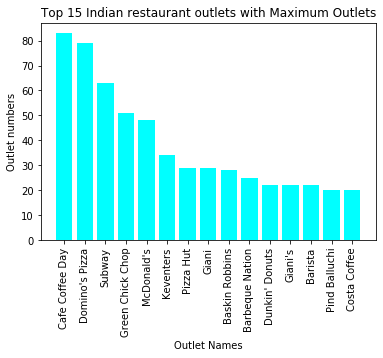

In [19]:
restaurant_india=list(df_india['Restaurant Name'].values)
restaurants={}
for i in restaurant_india:
    if i.strip() in restaurants:
        restaurants[i]+=1
    else:
        restaurants[i]=1
top15restaurants=dict(sorted(restaurants.items(), key=operator.itemgetter(1), reverse=True)[0:15])
keys, values= zip(*top15restaurants.items())
res_names=list(keys)
outlet_nos=list(values)
plt.bar(res_names, outlet_nos, color='Cyan')
plt.xticks(rotation=90)
plt.xlabel('Outlet Names')
plt.ylabel('Outlet numbers')
plt.title('Top 15 Indian restaurant outlets with Maximum Outlets')
plt.show()

## 4. Histogram of Restaurants using their aggregate ratings

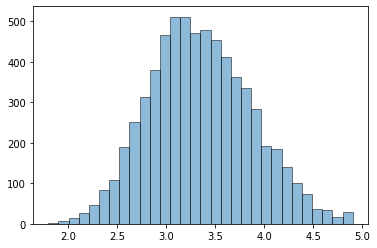

In [20]:
ratings=df_india['Aggregate rating'].loc[df_india['Aggregate rating']!=0].values
plt.hist(ratings, bins=30, alpha=0.5, edgecolor='black')
plt.show()

### Majority of Indian restaurants have an aggregate rating between 3 and 3.5 (vaguely).

## 5. Top 10 Highest Voted Indian Restaurants

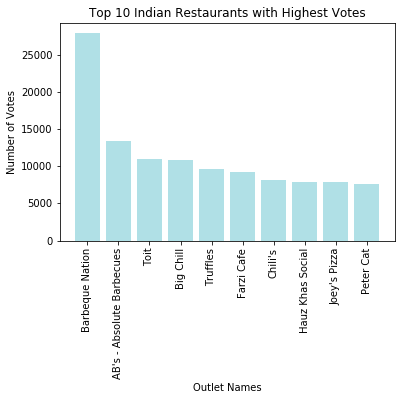

In [21]:
votes=list(df_india['Votes'].values)
a=[]
for i in range(len(votes)):
    b=(restaurant_india[i], votes[i])
    a.append(b)
res=defaultdict(list)
for i,j in a:
    res[i].append(j)
e=dict(res)
for i in e:
    e[i]=sum(e[i])
e=dict(sorted(e.items(), key=operator.itemgetter(1), reverse=True)[0:10])
keys, values=zip(*e.items())
res_names=list(keys)
outlet_votes=list(values)
plt.bar(res_names, outlet_votes, color='powderblue')
plt.xticks(rotation=90)
plt.title('Top 10 Indian Restaurants with Highest Votes')
plt.xlabel('Outlet Names')
plt.ylabel('Number of Votes')
plt.show()

## 6. Top 10 Cuisines in the US

In [22]:
df_usa=df.loc[df['Country Code']==216]
df_usa

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
82,17284404,Austin's BBQ and Oyster Bar,216,Albany,"2820 Meredyth Dr, Albany, GA 31707",Albany,"Albany, Albany",-84.221535,31.610387,"BBQ, Burger, Seafood",...,Dollar($),No,No,No,No,2,3.3,Orange,Average,35
83,17284203,BJ's Country Buffet,216,Albany,"2401 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.207095,31.608743,"American, BBQ",...,Dollar($),No,No,No,No,1,3.3,Orange,Average,25
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219400,31.615800,Mexican,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
86,17284397,Elements Coffee Co - Northwest,216,Albany,"2726 Ledo Rd Ste 10, Albany, GA 31707",Albany,"Albany, Albany",-84.206944,31.622412,"Coffee and Tea, Sandwich",...,Dollar($),No,No,No,No,1,3.4,Orange,Average,26
88,17284094,Chick-fil-A,216,Albany,"2703 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219300,31.616000,Fast Food,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,17697389,The Screaming Eagle,216,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
559,17697424,The Thai Bowl,216,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
560,17697332,Tokyo Japanese Steak House,216,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
561,17694056,Theo Yianni's Authentic Greek Restaurant,216,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


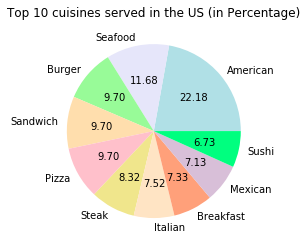

In [23]:
cuisines_usa=df_usa['Cuisines'].values
a=[]
for i in cuisines_usa:
    i=i.strip().split(',')
    for j in i:
        a.append(j.strip())
d={}
for i in a:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
d=dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True)[0:10])
keys, values= zip(*d.items())
cuisine_names=list(keys)
servings=list(values)
colors=['powderblue', 'lavender', 'palegreen', 'navajowhite', 'pink', 'khaki', 'bisque', 'lightsalmon', 'thistle', 'springgreen']
plt.pie(servings, labels=cuisine_names, colors=colors, autopct='%.2f')
plt.title('Top 10 cuisines served in the US (in Percentage)')
plt.show()